# Лабораторна робота №5

__Змоделювати розв'язок для заданого різницевого рівняння__:

$$ x_{n+1} = x_n + h[A(t_n) X_n + B(t_n)(W(t_{n+1})-W(t_n))], x(0) = \zeta$$

де $0 \le t_1 < t_2 < \dots < t_N \le T$ - точки розбиття відрізку $[0; T]$ з кроком $h$, так що $t_n = nh$, a $t_{k+1} - t_k = h$, $W(t)$ - вінерівський процес.

Згідно варіанту лабораторної роботи, $A(t) = t, B(t) = 0$.
А також $E\zeta=\frac{1}{2}, E\zeta^2=1$.

In [4]:
x_mean = 1/2

In [5]:
x_std = (1 - x_mean^2)^(1/2)

In [6]:
A = function(t) {
    return(t)
}

In [7]:
x = function(h, x_prev, t_prev) {
    return(x_prev + h * (A(t_prev) * x_prev))
}

In [8]:
x0 = function(x_mean, x_std) {
    return(rnorm(1, x_mean, x_std)[[1]])
}

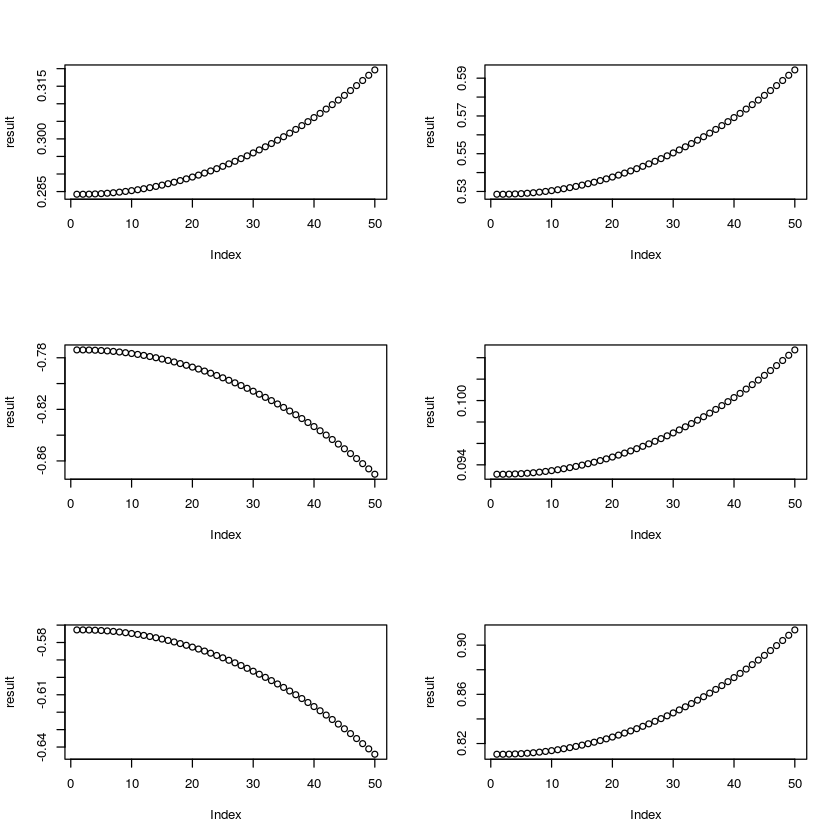

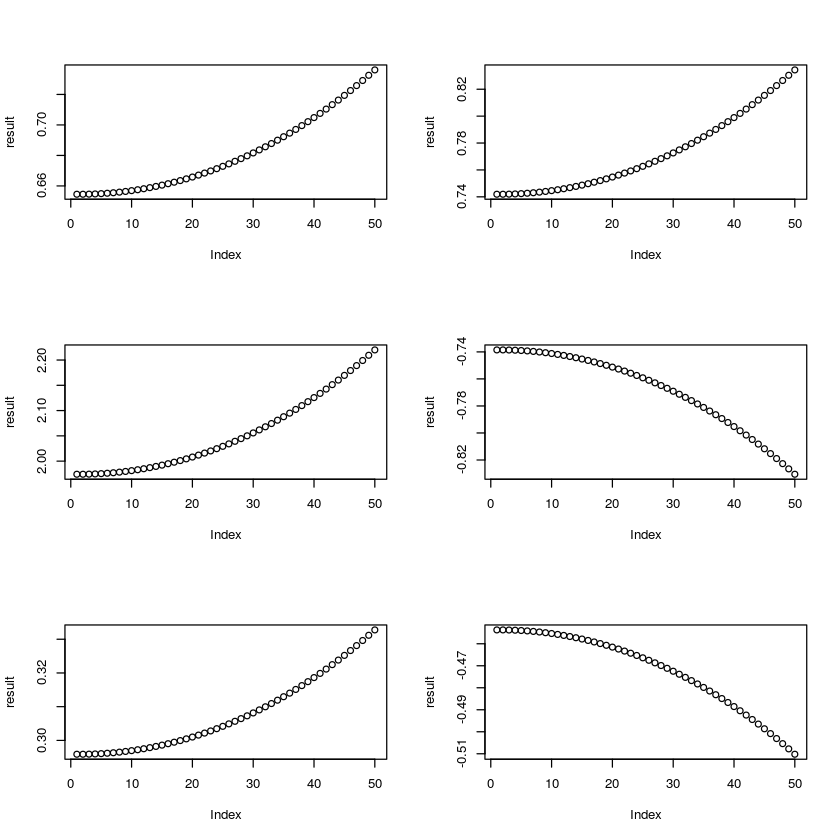

In [11]:
means = matrix(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), nrow=50, ncol=1)

amount_of_simulations = 12

par(mfrow=c(3,2))

for (j in 1:amount_of_simulations){
    t = c(0)
    h = 0.01
    
    result = c(x0(x_mean, x_std))
    means[1] = means[1] + result[1] / amount_of_simulations
    
    for (i in 1:49) {
        x_next = x(h, result[i], t[i])
        t = append(t, t[i] + h)
        result = append(result, x_next)
        
        means[i+1] = means[i+1] + x_next / amount_of_simulations
    }
    
    plot(result)
}

__Графік середнього значення__

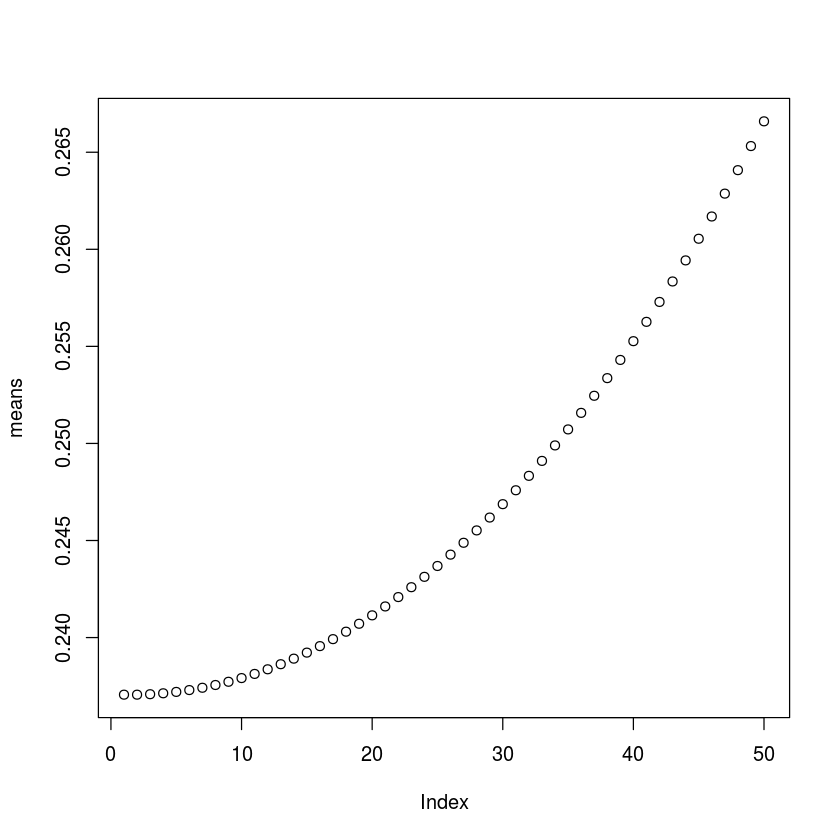

In [12]:
plot(means)